In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [15]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [16]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [17]:
dengue['Year'] = dengue['Year'].astype('int')
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Dengue cases trend</h1>

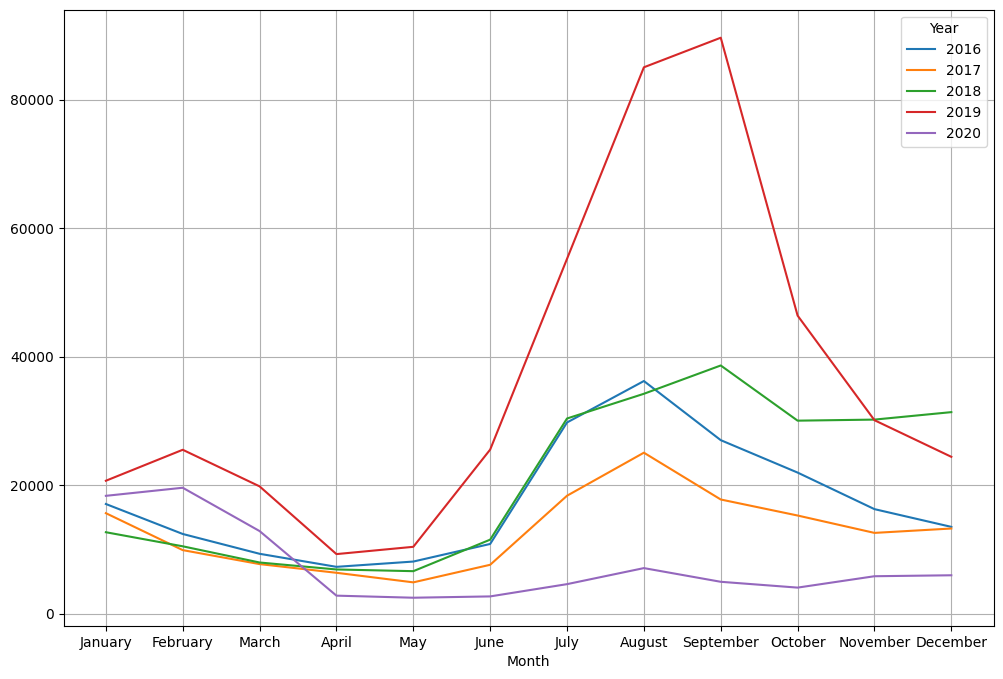

In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h2>Insight #1:</h2>

<p>Dengue cases start to increase during the month of June and reaches it's peak at the month of September.</p>
<p>According to article by reliefweb, an outbreak occured during January and September</p>
<p>Here are the statistics from the article: </p>    
<ul>
    <li>322,693 dengue cases, including 1,272 deaths, reported from 1 January to 21 September 2019: 115% higher than in 2018.</li>
    <li>8,856 newly reported dengue cases and 15 deaths between 15 and 21 September, decreased from 9,815 cases in the preceding week, but 25% higher than in the same epidemiological week in 2018.</li>
    <li>Weekly Case Fatality Rate (CFR) of 0.17% in epidemiological week 38 (15-21 September 2019) is lower than in the same time period in 2018 (0.45%).</li>
    <li>15 out of 17 regions exceed either the alert or the epidemic threshold</li>
</ul>

<h1>Dengue cases per region</h1>

In [19]:
Per_region = dengue.groupby(['Region'])['Dengue_Cases'].sum().reset_index()

In [20]:
Per_region

,Region,Dengue_Cases
0,BARMM,11537
1,CAR,30582
2,NCR,115966
3,Region I,59066
4,Region II,45141
5,Region III,131064
6,Region IV-A,163029
7,Region IV-B,30849
8,Region IX,47781
9,Region V,22167


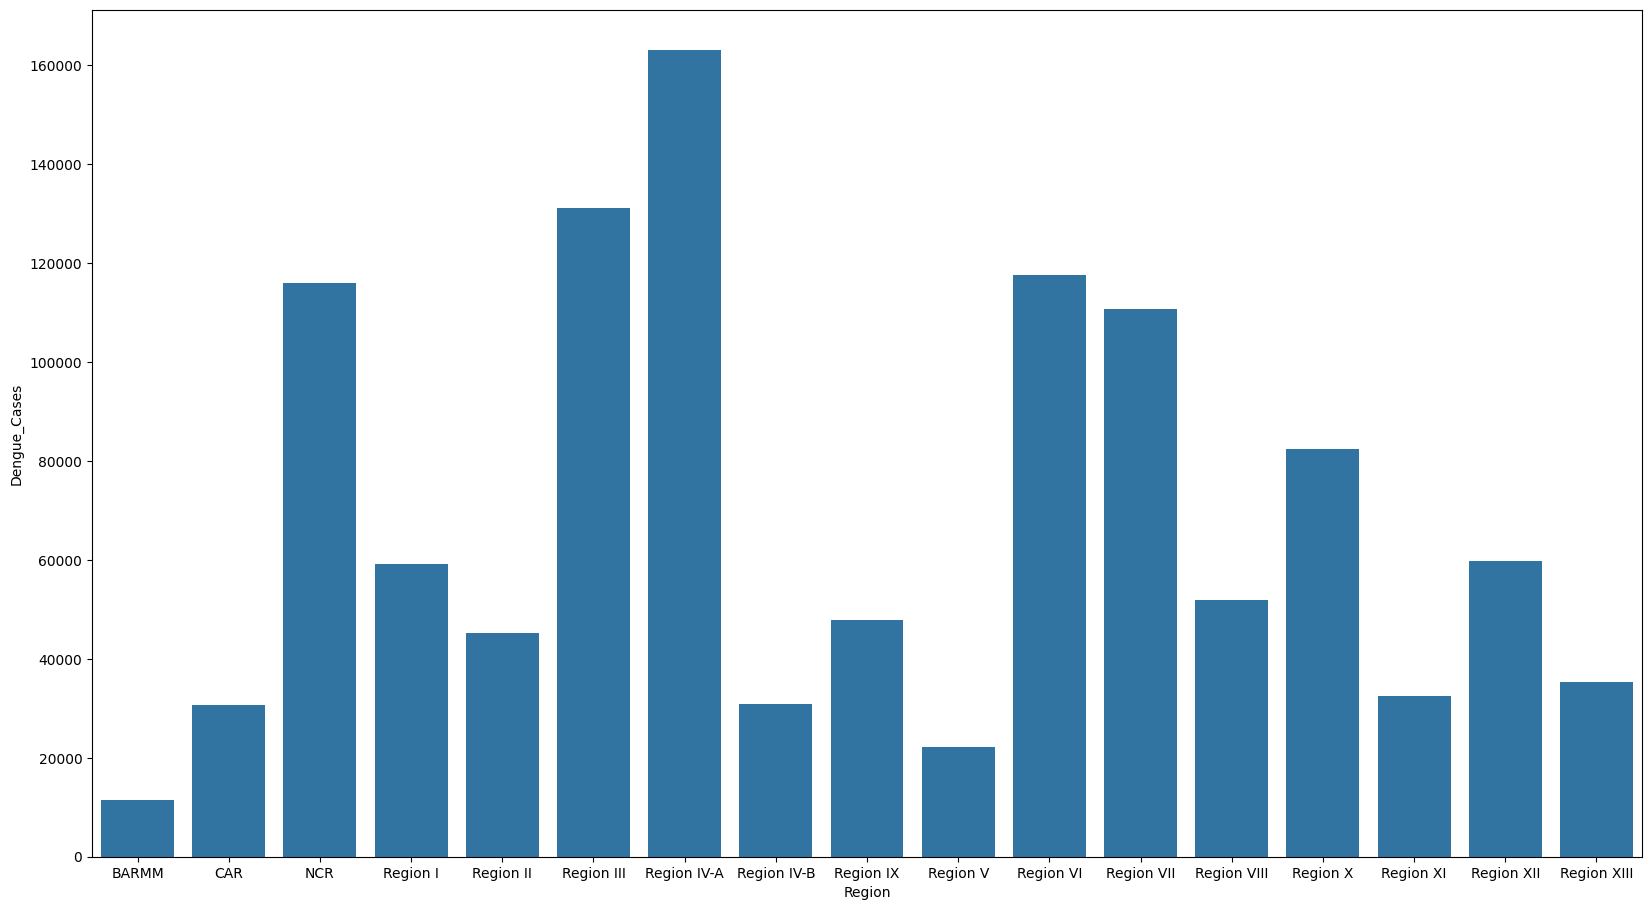

In [21]:
visual = sns.barplot(data=Per_region, x="Region",y="Dengue_Cases")
plt.gcf().set_size_inches(20,11)
plt.show()

<h2>Insight #2:</h2>
<p>According to the bar chart:</p>
<ul>
    <li>Region IV-A is the region with the highest cases of dengue</li>
    <li>BARMM is the region with the lowest number of dengue cases</li>
</ul>
<p>A research study was conducted about the dengue cases on Calabarzon during 2012-2018, they concluded that the climate condition affects the occurence of dengue cases</p>
<p>According to their conclusion:</p>
<ul>
    <li>Varying climate conditions significantly affect the occurrence of dengue disease in a certain place.
Each climatic variable – rainfall, humidity, minimum and maximum temperature – is associated with
dengue incidence with varying degrees in the provinces of Cavite, Laguna, Batangas, Rizal, and Quezon. </li>
    <li>The findings suggest that the total rainfall amount in Quezon province is moderately related to the dengue
cases in the whole region. More so, relative humidity in Cavite, Batangas, and Rizal province is moderately
related to the disease as well. Furthermore, the minimum temperature in Laguna province is strongly
associated with the elevated dengue cases in the region</li>
    <li>Thus, these findings show that there exists an
association between climatic factors and dengue incidence in the region based on the data from 2012 to
2018.</li>
</ul>
<p>We can use this as the basis for understanding the high number of dengue cases on this region.</p>
<a href="https://lpulaguna.edu.ph/wp-content/uploads/2022/01/1.-Magtibay-Sindao-Java-Saludo-Lat-Agawin-Quinto-Climatic-Factors-and-Clinical-Cases-Dengue.pdf">Reference</a>

<h1>Mortality rate analysis</h1>

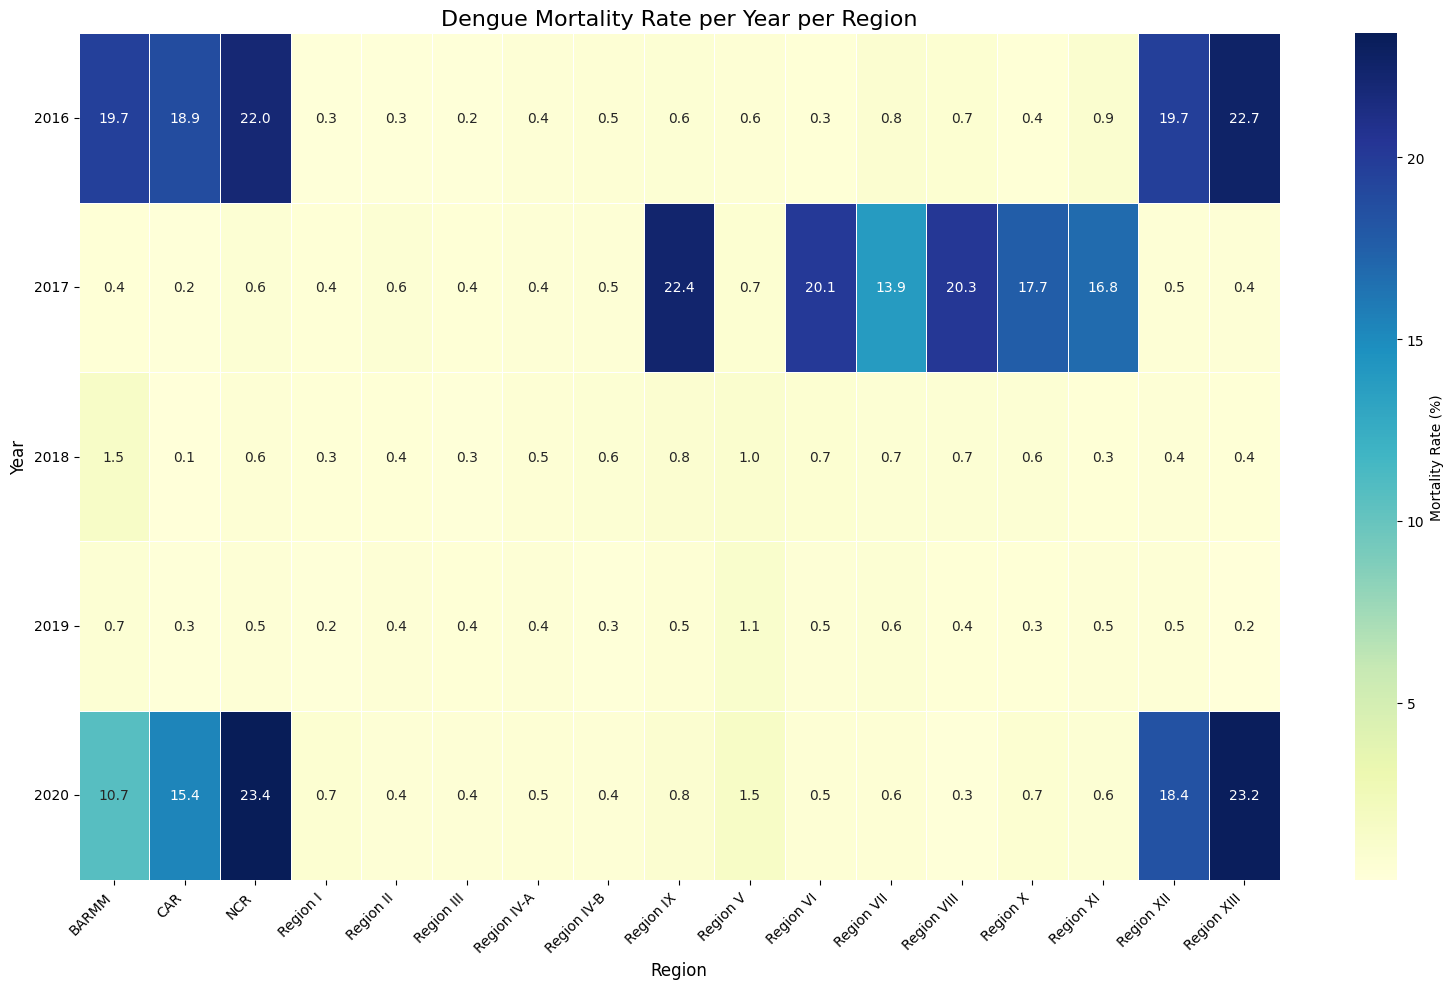

In [22]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2>Insight #3:</h2>
<p>By analyzing this heatmap, we found out that:</p>
<ul>
    <li>Even though CALABARZON is the region with the highest dengue cases, their mortality rate is among the lowest</li>
    <li>In contrary, BARMM, the region with the lowest number of case, experienced high mortality rate during 2016 and 2020. This suggest that varying reasons like poor healthcare affect the growth of mortality rate on this region </li>
    <li>The year 2019, which has the highest number of dengue cases, got low mortality rate on all region, this could mean that precautionary measures on the succeeding year took effect, if there is any./li>
</ul>


<h2>Trend of dengue cases (with seaborn)</h2>

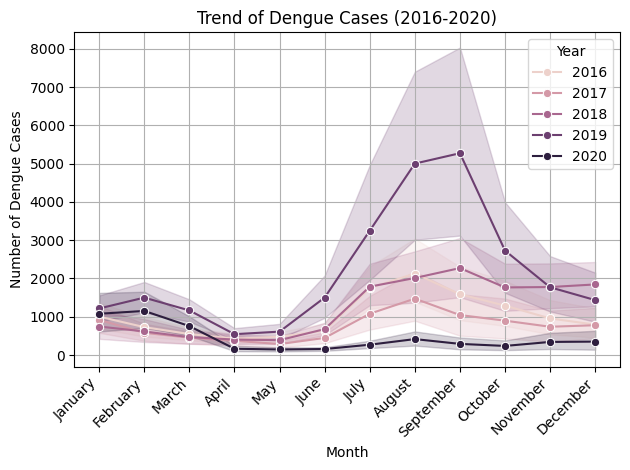

In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
# plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Insight #4:</h2>

<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

<h1>Mortality rate per region</h1>

In [24]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [25]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

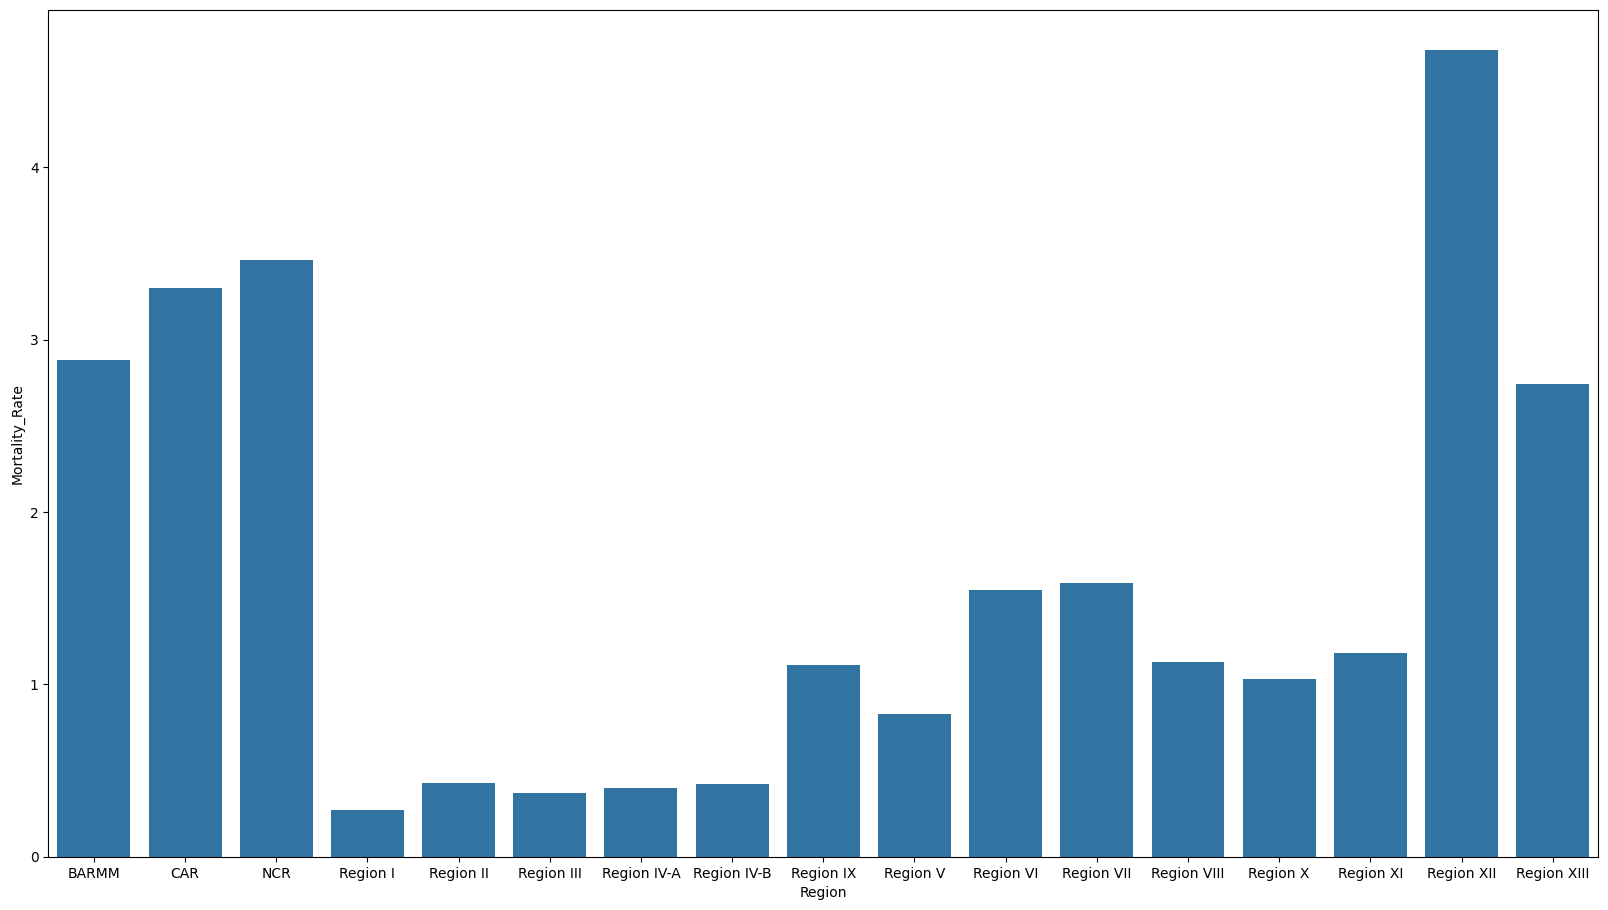

In [26]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h2>Insight  #5:</h2>
<p>By analyzing the chart, we found out that:</p>
<ul>
    <li>Regions with high dengue cases has low mortality rate, these regions have much better healthcare compared to other regions.</li>
    <li>Region XII has the highest mortality rate</li>
</ul>

<h1>Ratio of Dengue deaths per cases over time</h1>

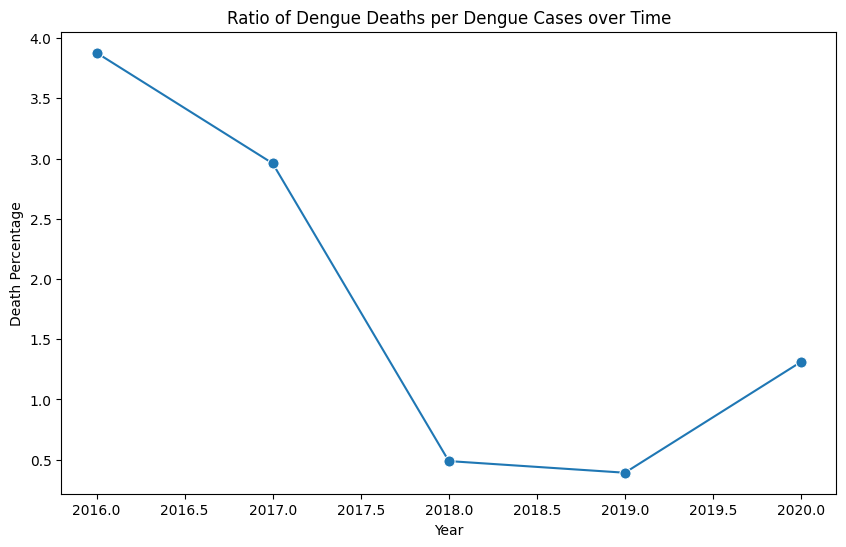

In [29]:
death_ratio= dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
death_ratio['Death_Percentage'] = (death_ratio['Dengue_Deaths'] / death_ratio['Dengue_Cases']) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=death_ratio, x='Year', y='Death_Percentage', marker='o', markersize=8)
plt.xlabel('Year')
plt.ylabel('Death Percentage')
plt.title('Ratio of Dengue Deaths per Dengue Cases over Time')
plt.show()

<h2>Insight #6:</h2>
<p>By analyzing the chart, we found out that:</p>
<ul>
    <li>The mortality rate decreased from 3.9% in 2019 to 1.3% in 2020. </li>
    <li>The number of deaths in 2020 is relatively low, in terms of the percentage compared to the number of cases, the number of deaths is higher than in 2018 and 2019.</li>
</ul>

<h1>Average dengue cases</h1>

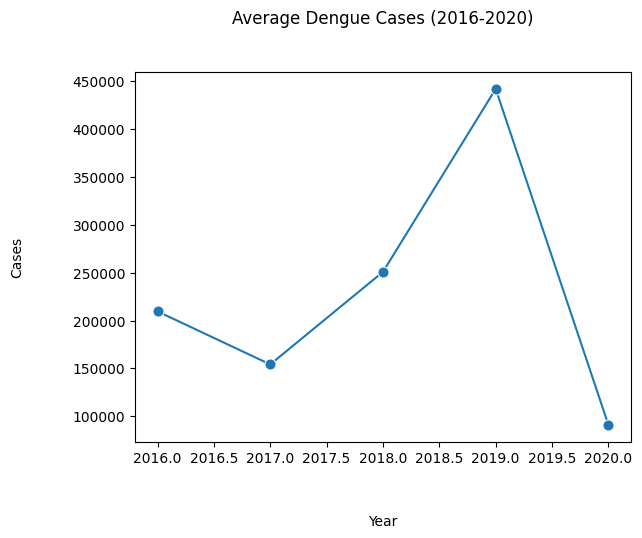

In [31]:
dengue_sum = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
sns.lineplot(data = dengue_sum, x = 'Year', y = 'Dengue_Cases', marker='o', markersize=8)
plt.title(label='Average Dengue Cases (2016-2020)', pad=35)
plt.xlabel(xlabel='Year', labelpad=35)
plt.ylabel(ylabel='Cases', labelpad=35)
plt.show()

<h2>Insight #7:</h2>
<p>By analyzing the chart, we found out that:</p>
<ul>
    <li>A decline can be seen during 2016-2017</li>
    <li>But then, then numer of cases, increased during early 2018 up to the middle of 2019</li>
    <li>An all-time low number of cases occured during the decline on 2020</li>
</ul>

<h1>Average dengue deaths</h1>

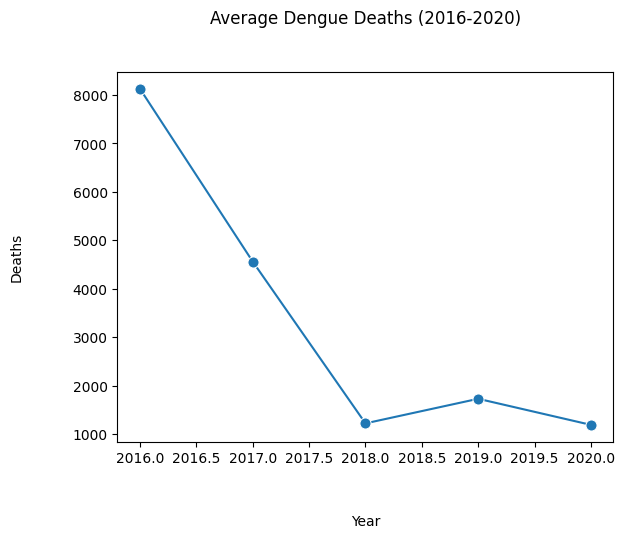

In [32]:
dengue_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()
sns.lineplot(data = dengue_deaths, x = 'Year', y = 'Dengue_Deaths', marker='o', markersize=8)
plt.title(label='Average Dengue Deaths (2016-2020)', pad=35)
plt.xlabel(xlabel='Year', labelpad=35)
plt.ylabel(ylabel='Deaths', labelpad=35)
plt.show()

<h2>Insight #8:</h2>
<p>By analyzing the chart, we found out that:</p>
<ul>
    <li>Dengue deaths started to decline during 2016-2018</li>
    <li>But with the high number of cases during 2019, the number of deaths increased too and then decline at the end of the year</li>
</ul>

<h1>Average dengue cases per month</h1>

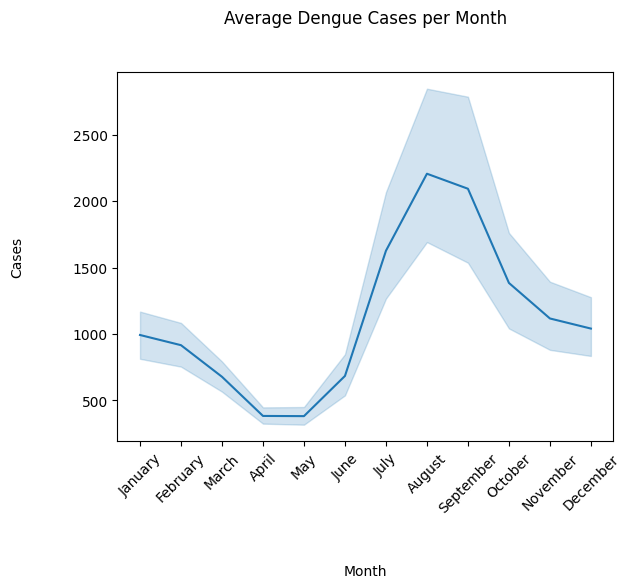

In [35]:
sns.lineplot(data = dengue, x = 'Month', y = 'Dengue_Cases')
plt.xticks(rotation = 45)
plt.title(label='Average Dengue Cases per Month', pad=35)
plt.xlabel(xlabel='Month', labelpad=35)
plt.ylabel(ylabel='Cases', labelpad=35)
plt.show()


<h2>Insight #9:</h2>
<p>By analyzing the chart, we found out that:</p>
<ul>
    <li>The month of August is the month with the highest number of dengue cases</li>
    <li>According to an article by <a href="https://www.dengue.com/seasons-may-shift-dengue-rates-dengue-remains-year-round-threat">dengue.com</a>Dengue outbreaks are most likely during the rainy or monsoon season, as most dengue epidemics occur during wetter and warmer months.2,3 Rainy season coincides with peaks in numbers of baby dengue-carrying mosquitoes.</li>
    <li>This makes the month of April to September a hot spot for dengue infection</li>
</ul>

<h1>Average dengue deaths per month</h1>

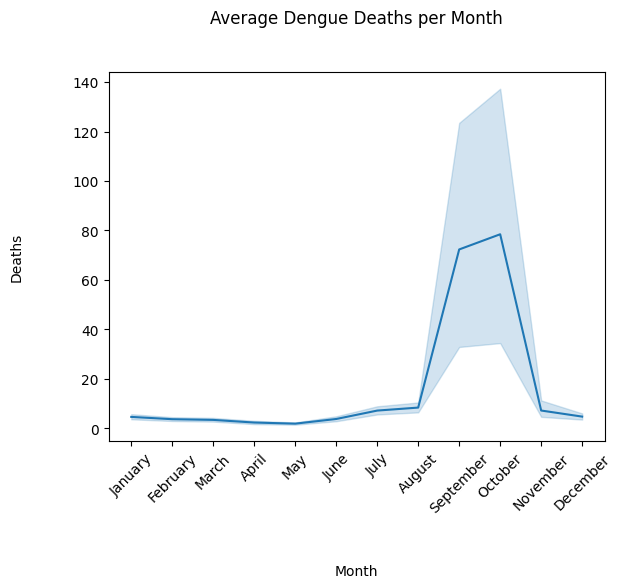

In [36]:
sns.lineplot(data = dengue, x = 'Month', y = 'Dengue_Deaths')
plt.xticks(rotation = 45)
plt.title(label='Average Dengue Deaths per Month', pad=35)
plt.xlabel(xlabel='Month', labelpad=35)
plt.ylabel(ylabel='Deaths', labelpad=35)
plt.show()

<h2>Insight #10:</h2>
<p>By analyzing the chart, we found out that:</p>
<ul>
    <li>Dengue deaths are high on the month of August to October</li>
    <li>The temperature can be factor according to the article earlier, and August has the highest number of cases.</li>
    <li>Dengue deaths during this period can be due to the high number of cases, or other factors like lack of healthcare assistance since there may be Hospital shortages</li>
</ul>